In [ ]:
# Name: Syed Sabbir Ahmed
# ID: 2301659

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
!pip install statsmodels
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.cluster import KMeans

# Answer to the question no:1

In [3]:
healthcare_data = pd.read_csv('healtcare_data.csv')
healthcare_data.head(200)

,Patient Age,Gender,BMI,Children,Smoker Status,Region,Procedure Type,Visit Duration,Total Charges
0,47,Male,35.00,3,No,Southwest,Consultation,15.56,3750.50
1,37,Female,32.62,3,Yes,Northeast,Surgery,5.03,7403.53
2,49,Female,28.30,0,No,Northeast,Laboratory Tests,5.27,3174.15
3,62,Female,24.77,3,Yes,Northwest,Surgery,44.39,8589.86
4,36,Male,31.49,4,No,Southeast,Other,33.40,3353.74
...,...,...,...,...,...,...,...,...,...
195,45,Female,30.20,3,Yes,Southwest,Consultation,30.26,8645.11
196,26,Male,27.90,4,No,Northwest,Laboratory Tests,10.77,3106.05
197,42,Male,30.76,2,No,Northwest,Consultation,24.69,3213.14
198,40,Female,29.12,0,No,Southeast,Other,26.61,2786.43


In [5]:
healthcare_data_converted = pd.get_dummies(healthcare_data, columns=['Gender', 'Smoker Status', 'Region', 'Procedure Type'])

print(healthcare_data_converted.head())

   Patient Age    BMI  Children  Visit Duration  Total Charges  Gender_Female  \
0           47  35.00         3           15.56        3750.50          False   
1           37  32.62         3            5.03        7403.53           True   
2           49  28.30         0            5.27        3174.15           True   
3           62  24.77         3           44.39        8589.86           True   
4           36  31.49         4           33.40        3353.74          False   

   Gender_Male  Smoker Status_No  Smoker Status_Yes  Region_Northeast  \
0         True              True              False             False   
1        False             False               True              True   
2        False              True              False              True   
3        False             False               True             False   
4         True              True              False             False   

   Region_Northwest  Region_Southeast  Region_Southwest  \
0             F

In [6]:
healthcare_data_converted.head()

,Patient Age,BMI,Children,Visit Duration,Total Charges,Gender_Female,Gender_Male,Smoker Status_No,Smoker Status_Yes,Region_Northeast,Region_Northwest,Region_Southeast,Region_Southwest,Procedure Type_Consultation,Procedure Type_Laboratory Tests,Procedure Type_Other,Procedure Type_Surgery
0,47,35.00,3,15.56,3750.50,False,True,True,False,False,False,False,True,True,False,False,False
1,37,32.62,3,5.03,7403.53,True,False,False,True,True,False,False,False,False,False,False,True
2,49,28.30,0,5.27,3174.15,True,False,True,False,True,False,False,False,False,True,False,False
3,62,24.77,3,44.39,8589.86,True,False,False,True,False,True,False,False,False,False,False,True
4,36,31.49,4,33.40,3353.74,False,True,True,False,False,False,True,False,False,False,True,False


In [444]:
scaler = MinMaxScaler()
columns_to_normalize = ['Patient Age', 'BMI', 'Visit Duration']
healthcare_data_converted[columns_to_normalize] = scaler.fit_transform(healthcare_data_converted[columns_to_normalize])
print(healthcare_data_converted.head())

   Patient Age       BMI  Children  Visit Duration  Total Charges  \
0     0.484536  0.690369         3        0.309823        3750.50   
1     0.381443  0.608215         3        0.085446        7403.53   
2     0.505155  0.459096         0        0.090560        3174.15   
3     0.639175  0.337245         3        0.924142        8589.86   
4     0.371134  0.569210         4        0.689964        3353.74   

   Gender_Female  Gender_Male  Smoker Status_No  Smoker Status_Yes  \
0          False         True              True              False   
1           True        False             False               True   
2           True        False              True              False   
3           True        False             False               True   
4          False         True              True              False   

   Region_Northeast  Region_Northwest  Region_Southeast  Region_Southwest  \
0             False             False             False              True   
1         

In [8]:
from sklearn.model_selection import train_test_split

X = healthcare_data_converted.drop('Total Charges', axis=1)  # Replace 'target_column_name' with the name of your target column
y = healthcare_data_converted['Total Charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 16)
X_test shape: (200, 16)
y_train shape: (800,)
y_test shape: (200,)


In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Value:", r2)

Mean Squared Error: 0.2210179777750048
Root Mean Squared Error: 0.4701254915179614
R-squared Value: 0.051831927177156456


In [11]:
coefficients = model.coef_
feature_names = X.columns


coefficients_dict = dict(zip(feature_names, coefficients))

sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)

print("Top influential factors determining total charges:")
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient}")

Top influential factors determining total charges:
Smoker Status_Yes: 984.7320629242196
Smoker Status_No: -984.7320629242193
Patient Age: 192.67972906524946
BMI: 116.81891931605333
Visit Duration: -25.89849214170679
Region_Northwest: 24.51413947229519
Procedure Type_Laboratory Tests: -21.644340459422654
Region_Northeast: -19.89051503347936
Procedure Type_Consultation: 13.454094758568464
Procedure Type_Other: 10.145758087225992
Gender_Male: 7.452531561292484
Gender_Female: -7.452531561292367
Region_Southeast: -7.168438939456212
Children: -6.442124937848611
Procedure Type_Surgery: -2.747410512195202
Region_Southwest: 2.143101271336771


Text(0, 0.5, 'Frequency')

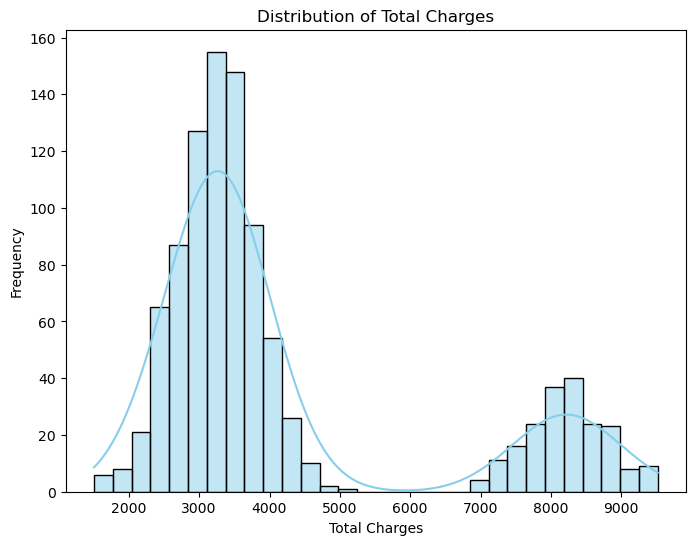

In [442]:
plt.figure(figsize=(8, 6))
sns.histplot(data=healthcare_data_converted, x='Total Charges', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

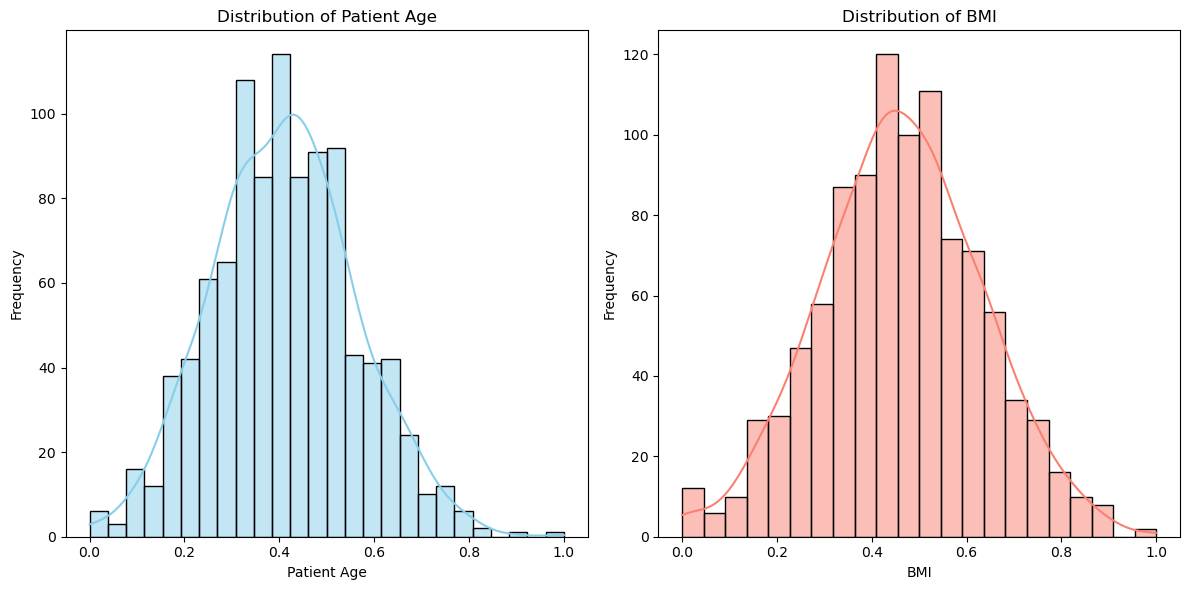

In [441]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data = healthcare_data_converted , x='Patient Age', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Patient Age')
axes[0].set_xlabel('Patient Age')
axes[0].set_ylabel('Frequency')

sns.histplot(data=healthcare_data_converted, x='BMI', kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of BMI')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\syede\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


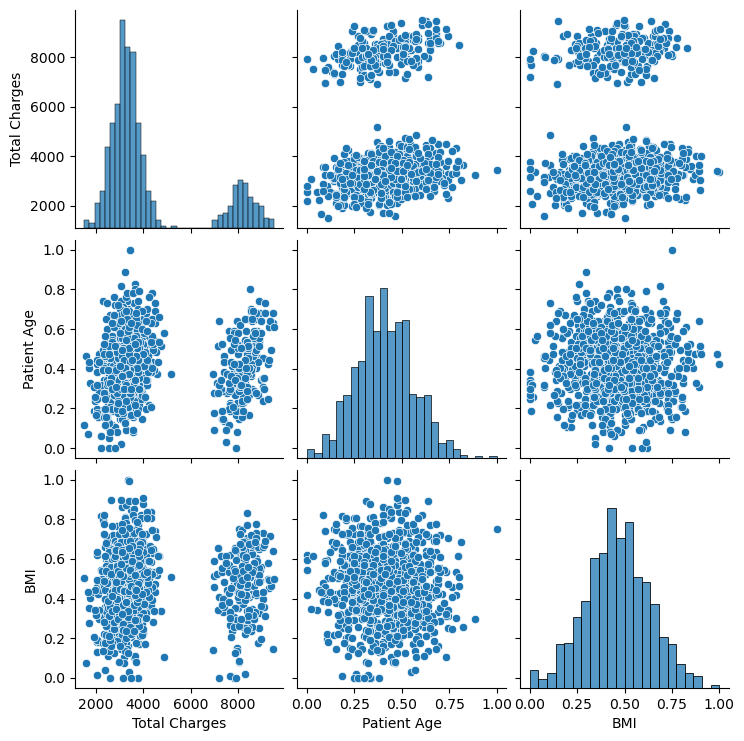

In [365]:
sns.pairplot(healthcare_data_converted[['Total Charges', 'Patient Age', 'BMI']])
plt.show()

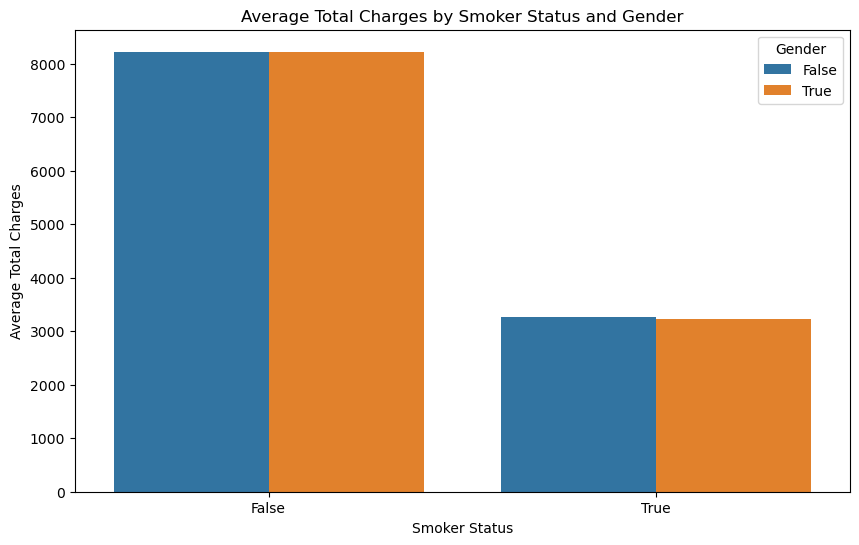

In [364]:
average_charges = healthcare_data_converted.groupby(['Smoker Status_No', 'Smoker Status_Yes', 'Gender_Female', 'Gender_Male'])['Total Charges'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Smoker Status_No', y='Total Charges', hue='Gender_Female', data=average_charges)
plt.title('Average Total Charges by Smoker Status and Gender')
plt.xlabel('Smoker Status')
plt.ylabel('Average Total Charges')
plt.legend(title='Gender')
plt.show()

# Answer to the question no:2

In [425]:
loan = pd.read_csv('loan_data.csv')
loan.head(300)

,Income,Credit Score,Loan Amount,Loan Term,Previous Default,Employment Status,Housing Status,Debt-to-Income Ratio,Number of Open Accounts,Loan Application Status
0,5732,753,32834,30,0,Self-employed,Rent,0.77,15,1
1,13799,700,39372,30,0,Self-employed,Mortgage,0.71,17,0
2,12845,677,29891,15,1,Employed,Mortgage,0.26,2,0
3,16123,708,46504,30,0,Unemployed,Rent,0.93,15,0
4,12225,778,45107,30,0,Self-employed,Rent,0.05,10,1
...,...,...,...,...,...,...,...,...,...,...
295,5660,628,47654,30,0,Employed,Mortgage,0.23,12,1
296,5353,652,15107,15,0,Self-employed,Own,0.94,12,0
297,10734,642,9789,15,0,Employed,Rent,0.92,19,1
298,13937,738,33065,15,0,Self-employed,Own,0.06,12,1


In [426]:
data_types =loan.dtypes
categorical_columns = data_types[data_types == 'object'].index.tolist()
print(categorical_columns)
loan = pd.get_dummies(loan, columns=['Employment Status', 'Housing Status'])

['Employment Status', 'Housing Status']


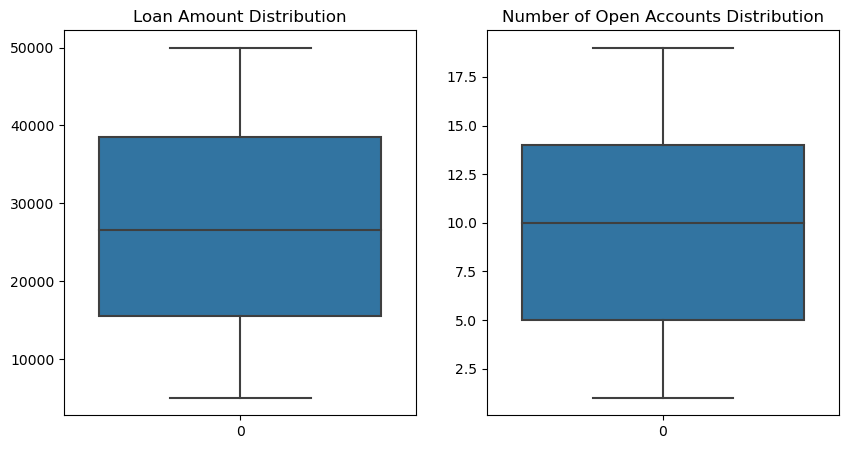

In [427]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(loan['Loan Amount'])
plt.title('Loan Amount Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(loan['Number of Open Accounts'])
plt.title('Number of Open Accounts Distribution')

plt.show()

z_score_loan_amount = np.abs((loan['Loan Amount'] - loan['Loan Amount'].mean()) / loan['Loan Amount'].std())
z_score_open_accounts = np.abs((loan['Number of Open Accounts'] - loan['Number of Open Accounts'].mean()) / loan['Number of Open Accounts'].std())

loan_without_outliers = loan[(z_score_loan_amount < 3) & (z_score_open_accounts < 3)]

In [428]:
columns_with_missing_values = loan.columns[loan.isnull().any()]

for column in columns_with_missing_values:
    if loan[column].dtype == 'object':
        loan[column].fillna(loan[column].mode()[0], inplace=True)
    else:
        loan[column].fillna(loan[column].mean(), inplace=True)

missing_values_after_handling = loan.isnull().sum()
print("Missing Values After Handling:")
print(missing_values_after_handling)

Missing Values After Handling:
Income                             0
Credit Score                       0
Loan Amount                        0
Loan Term                          0
Previous Default                   0
Debt-to-Income Ratio               0
Number of Open Accounts            0
Loan Application Status            0
Employment Status_Employed         0
Employment Status_Self-employed    0
Employment Status_Unemployed       0
Housing Status_Mortgage            0
Housing Status_Own                 0
Housing Status_Rent                0
dtype: int64


In [434]:
X = loan[['Income', 'Credit Score', 'Loan Amount','Loan Term','Previous Default','Debt-to-Income Ratio','Number of Open Accounts']]
y = loan[['Loan Application Status']]

In [435]:
X = loan.drop('Loan Application Status', axis=1)
y = loan['Loan Application Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (700, 13) (700,)
Test set shape: (300, 13) (300,)


In [438]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.12      0.19       130
           1       0.58      0.92      0.71       170

    accuracy                           0.57       300
   macro avg       0.55      0.52      0.45       300
weighted avg       0.55      0.57      0.48       300


Confusion Matrix:
[[ 15 115]
 [ 14 156]]


In [440]:
conf_matrix = confusion_matrix(y_test, y_pred)

false_positives = conf_matrix[0, 1]

print("Number of False Positives:", false_positives)

Number of False Positives: 115


# Answer to the question No: 3

In [294]:
customer = pd.read_csv('customer_data.csv')
customer.head(200)

,Annual Income,Spending Score,Age,Gender,Membership Duration
0,64000,32,61,Female,3
1,67000,14,36,Male,4
2,84000,72,63,Male,2
3,87000,57,41,Male,8
4,87000,25,19,Female,2
...,...,...,...,...,...
195,103000,35,40,Female,7
196,53000,52,30,Male,2
197,52000,31,33,Female,8
198,90000,54,52,Male,8


In [295]:
customer.dtypes

Annual Income           int64
Spending Score          int64
Age                     int64
Gender                 object
Membership Duration     int64
dtype: object

In [296]:
customer.head()

,Annual Income,Spending Score,Age,Gender,Membership Duration
0,64000,32,61,Female,3
1,67000,14,36,Male,4
2,84000,72,63,Male,2
3,87000,57,41,Male,8
4,87000,25,19,Female,2


In [297]:
customer['Gender__'] = customer['Gender'].apply(lambda x: True if x == 'Female' else False)
customer['Gender_'] = customer['Gender__'].astype(int)
customer_m = customer.drop(columns=['Gender__'])

In [298]:
customer_m.head()

,Annual Income,Spending Score,Age,Gender,Membership Duration,Gender_
0,64000,32,61,Female,3,1
1,67000,14,36,Male,4,0
2,84000,72,63,Male,2,0
3,87000,57,41,Male,8,0
4,87000,25,19,Female,2,1


In [311]:
customer_modified = customer_m.assign(Gender=customer['Gender_'])

In [312]:
customer_modified.head()

,Annual Income,Spending Score,Age,Gender,Membership Duration,Gender_
0,64000,32,61,1,3,1
1,67000,14,36,0,4,0
2,84000,72,63,0,2,0
3,87000,57,41,0,8,0
4,87000,25,19,1,2,1


In [321]:
customer_clust = customer_modified.drop(columns=['Gender_'])
customer_clust.head()

,Annual Income,Spending Score,Age,Gender,Membership Duration
0,64000,32,61,1,3
1,67000,14,36,0,4
2,84000,72,63,0,2
3,87000,57,41,0,8
4,87000,25,19,1,2


In [322]:
customer_clust = customer_clust.apply(lambda x: preprocessing.scale(x))
customer_clust.head()

,Annual Income,Spending Score,Age,Gender,Membership Duration
0,-0.162634,-0.627615,1.149038,1.030464,-0.745143
1,-0.057709,-1.268038,-0.507114,-0.970437,-0.353992
2,0.536868,0.795548,1.281531,-0.970437,-1.136295
3,0.641794,0.261862,-0.175883,-0.970437,1.210613
4,0.641794,-0.876668,-1.633297,1.030464,-1.136295


In [332]:
customer_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Annual Income        200 non-null    float64
 1   Spending Score       200 non-null    float64
 2   Age                  200 non-null    float64
 3   Gender               200 non-null    float64
 4   Membership Duration  200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [325]:
sse_clust = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(customer_clust)
    sse_clust.append(kmeans.inertia_)
    
sse_clust

C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[1000.0,
 791.5684220731421,
 698.8692316786614,
 611.7195352285546,
 559.9707648244361,
 513.8301817864289,
 461.50196508394356,
 433.8938168019213,
 404.6874191716529,
 375.6134946496419]

C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

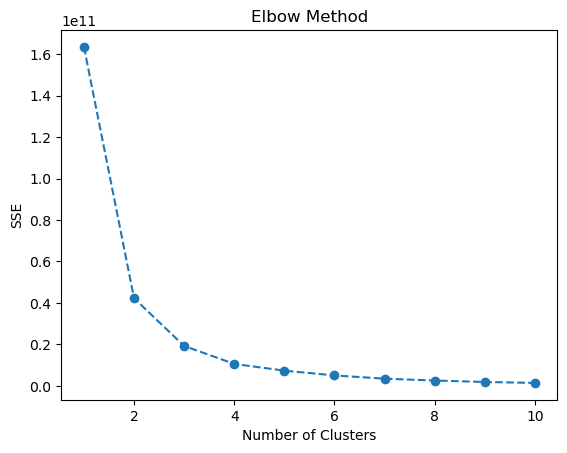

In [341]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(customer_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [339]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

y_clust = kmeans.fit_predict(customer_clust)

y_clust

C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 3, 0, 1, 1, 3, 0, 2, 0, 0, 2,
       3, 0, 1, 3, 2, 0, 0, 1, 1, 1, 1, 3, 0, 1, 2, 3, 0, 2, 2, 2, 0, 2,
       3, 2, 2, 0, 2, 2, 1, 3, 3, 2, 2, 2, 0, 1, 2, 0, 2, 3, 2, 2, 3, 3,
       2, 1, 0, 3, 0, 2, 1, 1, 1, 2, 3, 1, 1, 2, 2, 1, 0, 3, 3, 3, 0, 2,
       1, 3, 3, 0, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0, 3, 0, 1, 1, 0, 1, 3, 3,
       0, 0, 3, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 3, 3, 0, 1, 0, 2, 1, 3,
       3, 3, 0, 3, 1, 1, 3, 2, 2, 3, 0, 0, 2, 1, 0, 0, 2, 2, 1, 3, 0, 2,
       3, 2, 0, 2, 0, 3, 3, 3, 2, 2, 2, 0, 0, 3, 3, 1, 2, 1, 1, 2, 1, 3,
       0, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 2, 3, 2, 2, 0, 3, 1, 1, 3, 2, 3,
       1, 0])

In [345]:
customer_clust.groupby(y_clust).mean()

,Annual Income,Spending Score,Age,Gender,Membership Duration
0,0.293441,0.305268,0.136798,1.030464,-0.854666
1,0.868404,-0.008687,-0.064093,-0.970437,0.020861
2,-0.987412,-0.131448,0.311929,-0.970437,0.022936
3,-0.043570,-0.162059,-0.445096,1.030464,0.861074


In [355]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)

y_clust = kmeans.fit_predict(customer_clust)

pd.crosstab(customer.Gender, y_clust)

C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\syede\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


col_0,0,1
Gender,,
Female,97,0
Male,0,103
